'''Questions to answers
1) In which month, area burnt due to forestfire is maximum?
2) In which day, area burnt due to forestfire is maximum?
3) Is highest temparature cause more area to burn?
4) Is high wind increase the area burnt?
5) Is more rain reduce the area burnt?
'''

In [1]:
#importing the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('forest_fires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


'''The data contains different columns, in which area is our target variable(dependent variable) and other are independent variables.
1) X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2) Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3) month - month of the year: 'jan' to 'dec'
4) day - day of the week: 'mon' to 'sun'
5) FFMC - FFMC index from the FWI system: 18.7 to 96.20
6) DMC - DMC index from the FWI system: 1.1 to 291.3
7) DC - DC index from the FWI system: 7.9 to 860.6
8) ISI - ISI index from the FWI system: 0.0 to 56.10
9) temp - temperature in Celsius degrees: 2.2 to 33.30
10) RH - relative humidity in %: 15.0 to 100
11) wind - wind speed in km/h: 0.40 to 9.40
12) rain - outside rain in mm/m2 : 0.0 to 6.4
13) area - the burned area of the forest (in ha): 0.00 to 1090.84
'''

In [3]:
#shape of data
df.shape

(517, 13)

In [4]:
#type of variable
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Here month,day are of object type and rest are of int64 and float64 types.

In [5]:
#Is data containg null values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There is no null values

# In which month, area burnt due to forestfire is maximum?

In [6]:
df.groupby('month')['area'].mean()

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

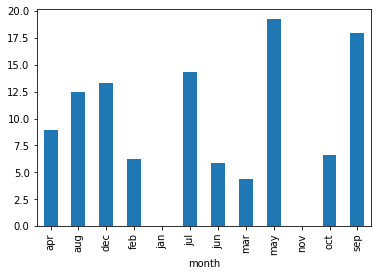

In [7]:
df.groupby('month')['area'].mean().plot.bar()

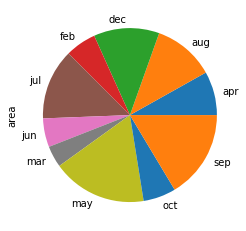

In [8]:
df.groupby('month')['area'].mean().plot.pie()

The maximum area is burnt in the month of may(19.24 hactare average) followed by sep and jul.
No area is burnt in jan.

# In which day, area burnt due to forestfire is maximum?

In [9]:
df.groupby('day')['area'].mean()

day
fri     5.261647
mon     9.547703
sat    25.534048
sun    10.104526
thu    16.345902
tue    12.621719
wed    10.714815
Name: area, dtype: float64

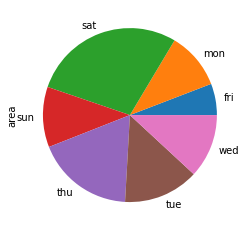

In [10]:
df.groupby('day')['area'].mean().plot.pie()

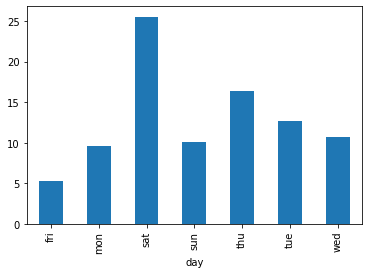

In [12]:
df.groupby('day')['area'].mean().plot.bar()

Most area is burnt on saturday(25.53 ha approax) followed by thursday and tuesday.

# Is highest temparature cause more area to burn?

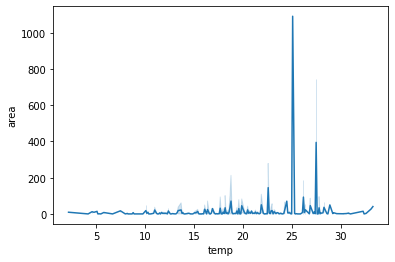

In [13]:
sns.lineplot(x='temp',y='area',data=df)

At temparature of of 25 degree celcius, area burnt increase sharply.

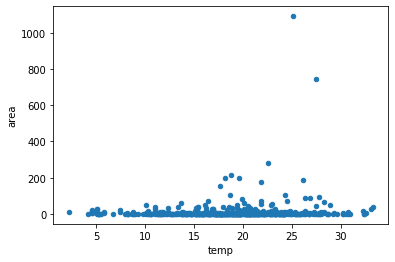

In [14]:
df.plot.scatter('temp','area')

In [15]:
df['temp'].corr(df['area'])

0.09784410734168464

There is not much effect of temparature on area burnt.
We can't say that increase temp will increase the area.

# Is high wind increase the area burnt?

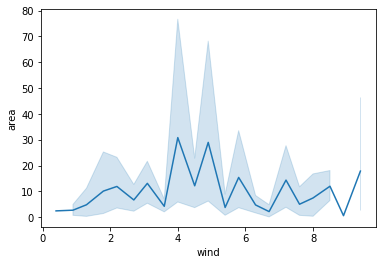

In [19]:
sns.lineplot(x='wind',y='area',data=df)

The area during wind b/w 4 to 5 and 5 to 6 is large.

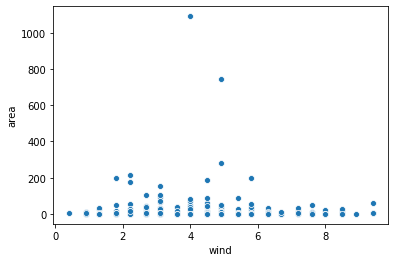

In [17]:
sns.scatterplot(x='wind',y='area',data=df)

In [18]:
df['wind'].corr(df['area'])

0.012317276888673111

There is not much effect of wind on area burnt.

# Is more rain reduce the area burnt?

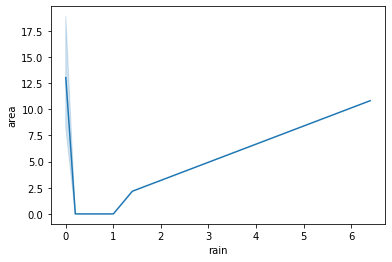

In [20]:
sns.lineplot(x='rain',y='area',data=df)

After 1cm, increase of rain increase the area of fire.
Further we draw scatter plot to get information correctly.

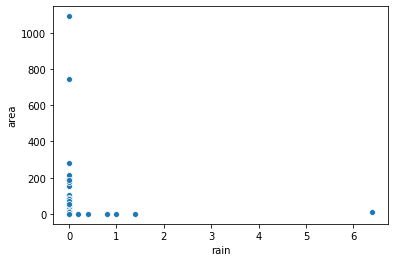

In [21]:
sns.scatterplot(x='rain',y='area',data=df)

In [22]:
df['rain'].corr(df['area'])

-0.0073657292792922826

There is poor negative correlation of rain and area.

In [23]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [24]:
df.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

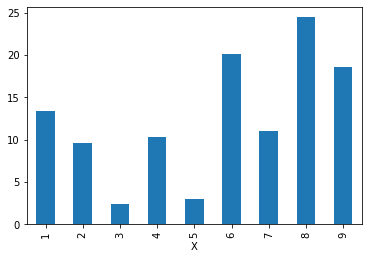

In [25]:
df.groupby('X')['area'].mean().plot.bar()

x-cordinate value 7 has most area burnt.

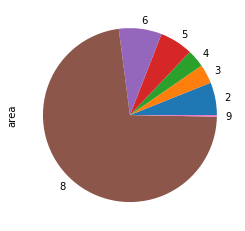

In [26]:
df.groupby('Y')['area'].mean().plot.pie()

Y-cordinate value 8 has more than 50% area burnt.

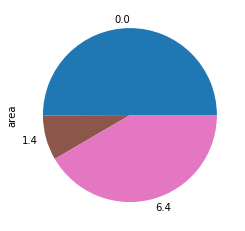

In [27]:
df.groupby('rain')['area'].mean().plot.pie()

The rain of 0.0 cm has highest burnt area.

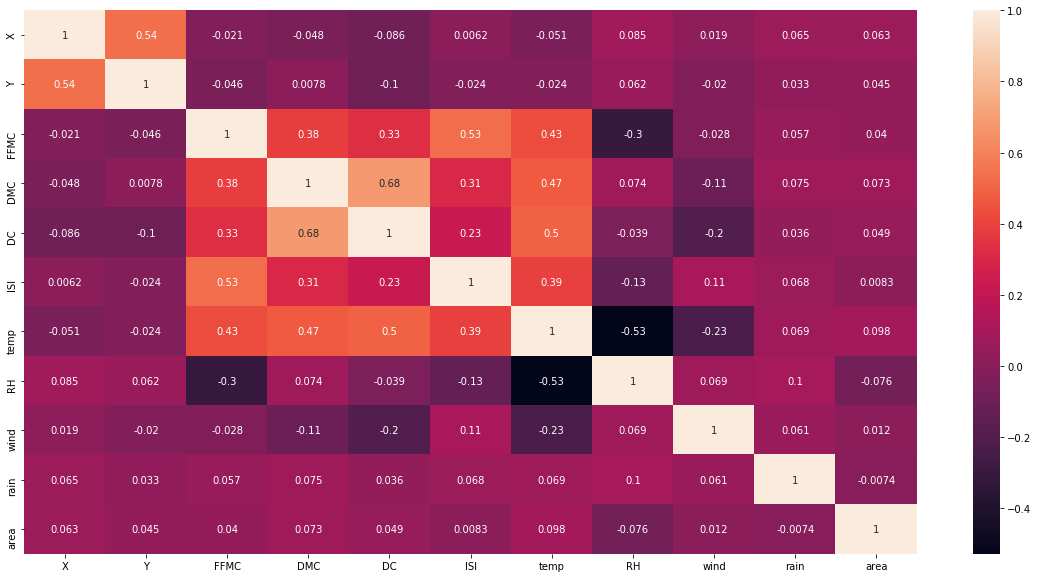

In [30]:
figdims = (20,10)
plt.subplots(figsize=figdims)
sns.heatmap(df.corr(),annot=True)

X and Y has correlation of 0.54
DC and DMC has correlatin of 0.68
IFC and FFMC has correlation of 0.53
temp and DC has correlation of 0.5
ISI and FFMC has correlation of 0.53
RH and temp has correlation 0f -0.53

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd12c2edd0>,
      dtype=object)

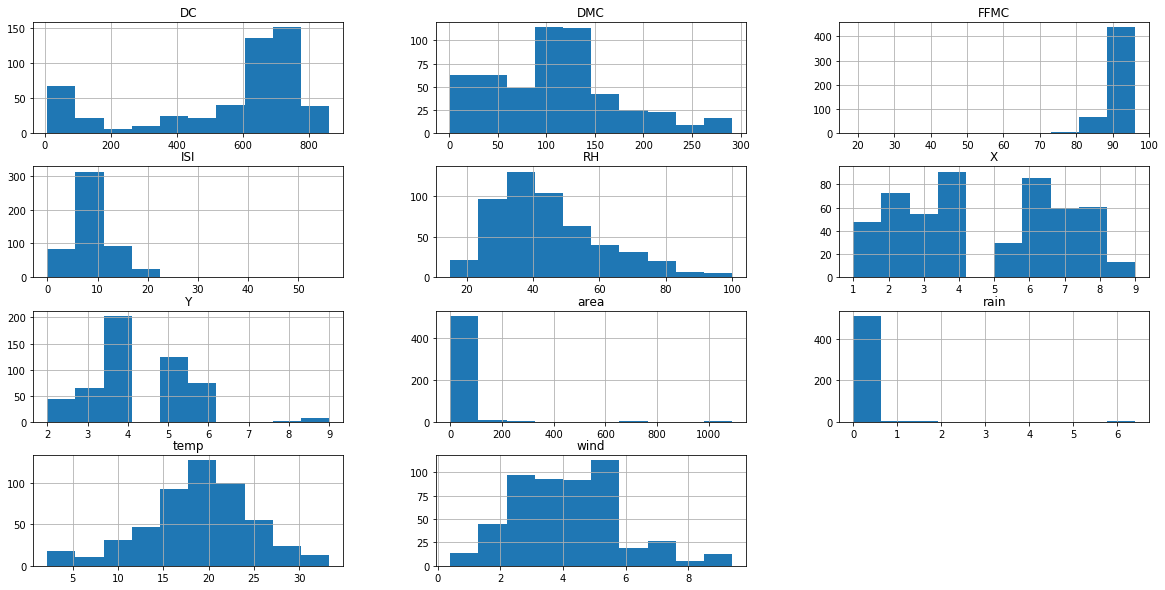

In [36]:
df.hist(figsize=(20,10))

area is lie b/w 0 to 100
rain is lie b/w 0 to 0.5
most frequent temp is lie b/w 15 to 25
most frequent wind is 2 to 5
FFMC is lie b/w 90 to 100

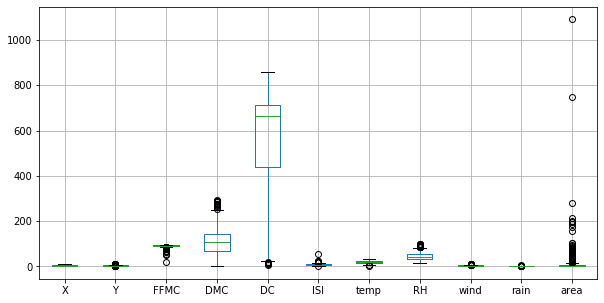

In [38]:
df.boxplot(figsize=(10,5))

There are outlier present in the data given.

#### End